In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score


In [2]:
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))

# to apply a classifier on this data, we need to flatten the image: instead of a 8x8 matrix we
# have to use a one-dimensional array with 64 items
data = digits.images.reshape((len(digits.images), -1))


In [3]:
classifier = svm.SVC(gamma=0.001)

# 75% of the original data-set if for training
train_test_split = int(len(digits.images) * 0.75)
classifier.fit(data[:train_test_split], digits.target[:train_test_split])


SVC(gamma=0.001)

In [4]:
# now predict the value of the digit on the 25%
expected = digits.target[train_test_split:]
predicted = classifier.predict(data[train_test_split:])

print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print(accuracy_score(expected, predicted))


Confusion matrix:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  2  0  1  4  0]
 [ 0  0  0  0 45  0  0  0  1  2]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0  0 40  0]
 [ 0  0  0  1  0  1  0  0  0 43]]
0.9666666666666667


Prediction for test image:  [8]


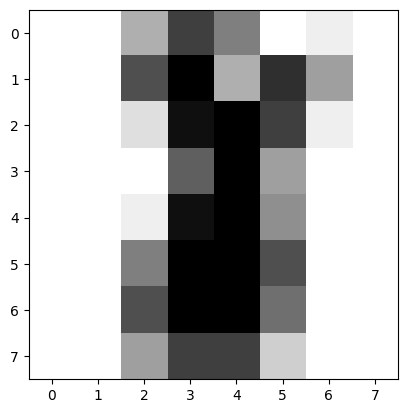

In [21]:
# let's test on the last few images
idx = -7
plt.imshow(digits.images[idx], cmap=plt.cm.gray_r, interpolation='nearest')
print("Prediction for test image: ", classifier.predict(data[idx].reshape(1, -1)))

plt.show()
